# Reproduce results

<div style="color:red; font-size:14px;">!! Don't define functions here, import them from utils.py</div>

This notebook loads the trained models from disk and shows the results obtained with them.

## Imports

In [1]:
import pandas as pd

from skseq.id_feature import IDFeatures
from skseq.extended_feature import ExtendedFeatures
from skseq.structured_perceptron import StructuredPerceptron

from utils.utils import *

from tensorflow.keras.models import load_model


2023-06-16 17:16:57.518373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%load_ext autoreload
%autoreload 2

## Create Train, Test and Tiny Test sets

In [3]:
train = pd.read_csv("data/train_data_ner.csv")
test = pd.read_csv("data/test_data_ner.csv")

In [4]:
X_train, y_train = get_data_target_sets(train)
X_test, y_test = get_data_target_sets(test)
X_tiny, y_tiny = get_tiny_test()

Processing: 100%|██████████| 38367/38367 [00:37<00:00, 1010.86sentence/s]


### Create Corpus

In [5]:
word_dict, tag_dict, tag_dict_rev = create_corpus(X_train, y_train)

### Create Sequence List

In [6]:
train_seq = create_sequence_list(word_dict, tag_dict, X_train, y_train)

Adding sequences: 100%|██████████| 38366/38366 [05:29<00:00, 116.47sequence/s]


### Create True Tags

In [7]:
train_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_train]
y_train_true = [tag for array in train_tag_pos for tag in array]

test_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_test]
y_test_true = [tag for array in test_tag_pos for tag in array]

tiny_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_tiny]
y_tiny_true = [tag for array in tiny_tag_pos for tag in array]

## Evaluate Models

<div class="alert" style="padding: 20px;background-color: #2cbc84; color: white; margin-bottom: 15px;">
<h3>Structured Perceptron w/ Default Features</h3>
</div>

### Load Model

In [8]:
feature_mapper = IDFeatures(train_seq)
feature_mapper.build_features()

sp = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp_c = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.load_model(dir='fitted_models/01_SP_Default_Features')
sp_c.load_model(dir='fitted_models/01C_SP_Default_Features')

### Evaluate Model

#### Train set

##### Model built without Cython

In [9]:
y_train_pred = predict_SP(sp, X_train)

Predicting tags: 100%|██████████| 38366/38366 [04:06<00:00, 155.42sequence/s]


Accuracy: 0.9683
F1 Score: 0.9682


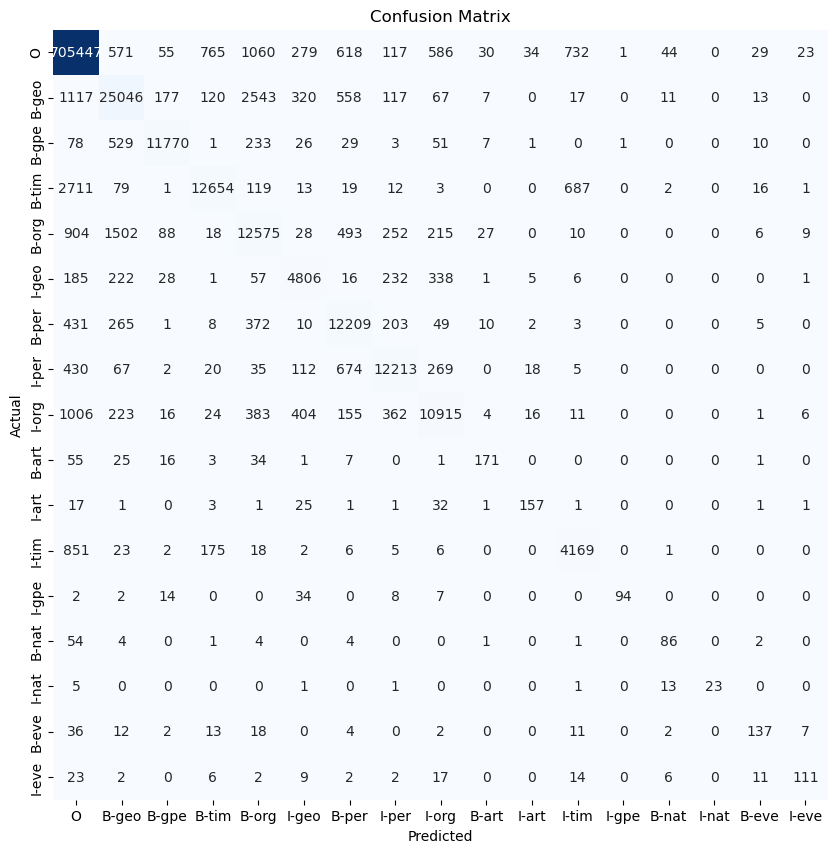

In [10]:
evaluate(y_train_true, y_train_pred, tag_dict_rev)

##### Model built with Cython

In [11]:
y_train_pred_c = predict_SP(sp_c, X_train)

Predicting tags: 100%|██████████| 38366/38366 [04:05<00:00, 156.11sequence/s]


Accuracy: 0.9683
F1 Score: 0.9682


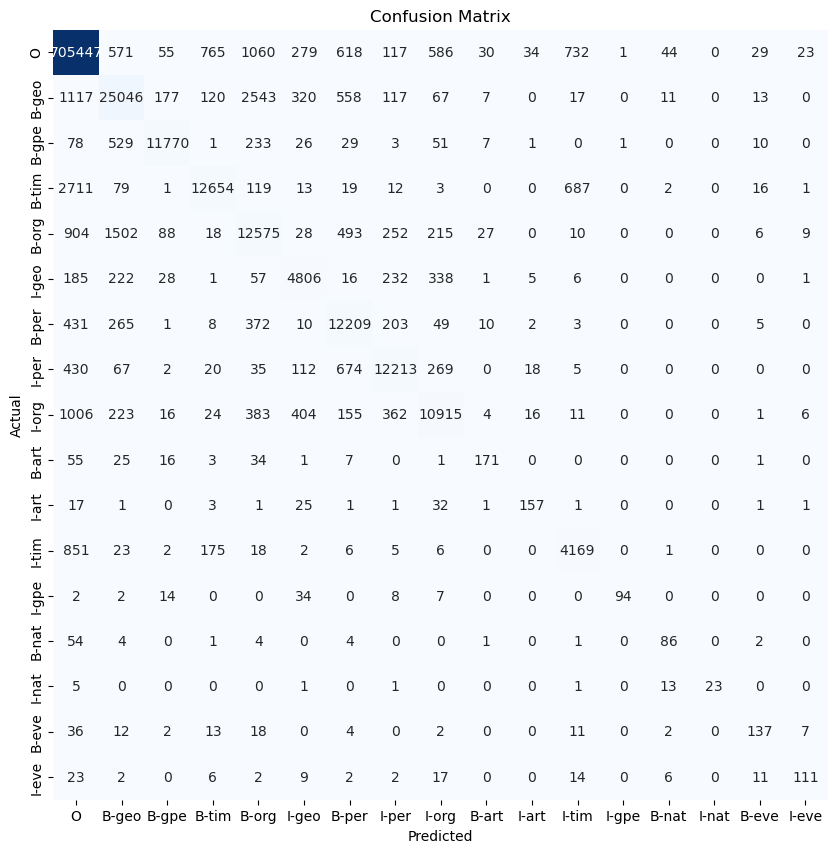

In [12]:
evaluate(y_train_true, y_train_pred_c, tag_dict_rev)

#### Test set

##### Model built without Cython

In [13]:
y_test_pred = predict_SP(sp, X_test)

Predicting tags: 100%|██████████| 38367/38367 [04:07<00:00, 154.75sequence/s]


Accuracy: 0.8808
F1 Score: 0.8579


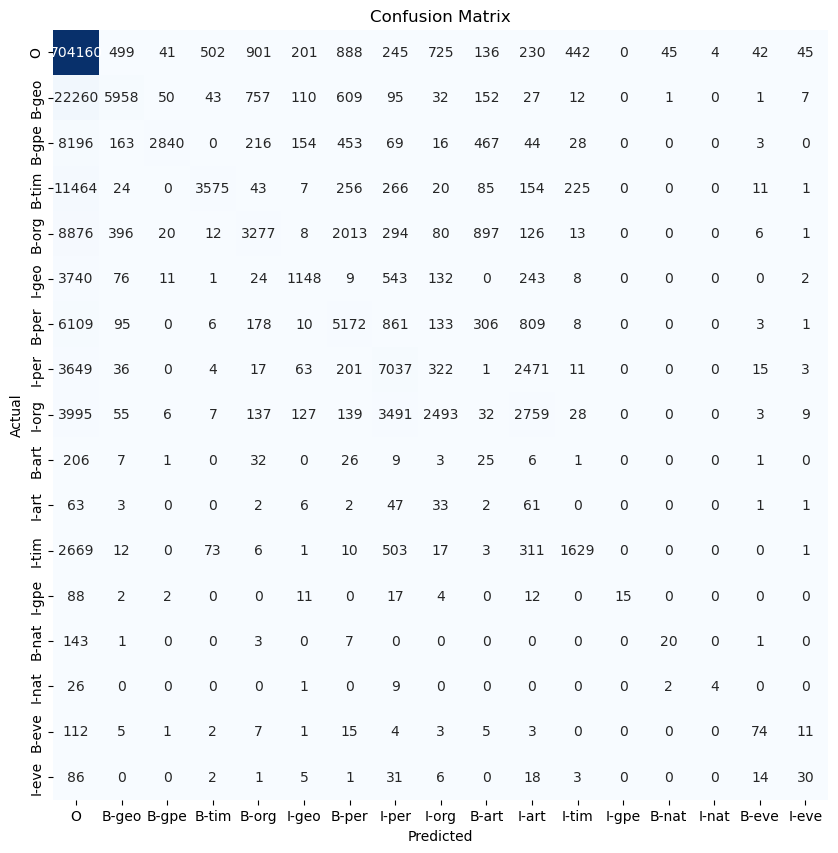

In [14]:
evaluate(y_test_true, y_test_pred, tag_dict_rev)

##### Model built with Cython

In [15]:
y_test_pred_c = predict_SP(sp_c, X_test)

Predicting tags: 100%|██████████| 38367/38367 [04:05<00:00, 156.06sequence/s]


Accuracy: 0.8808
F1 Score: 0.8579


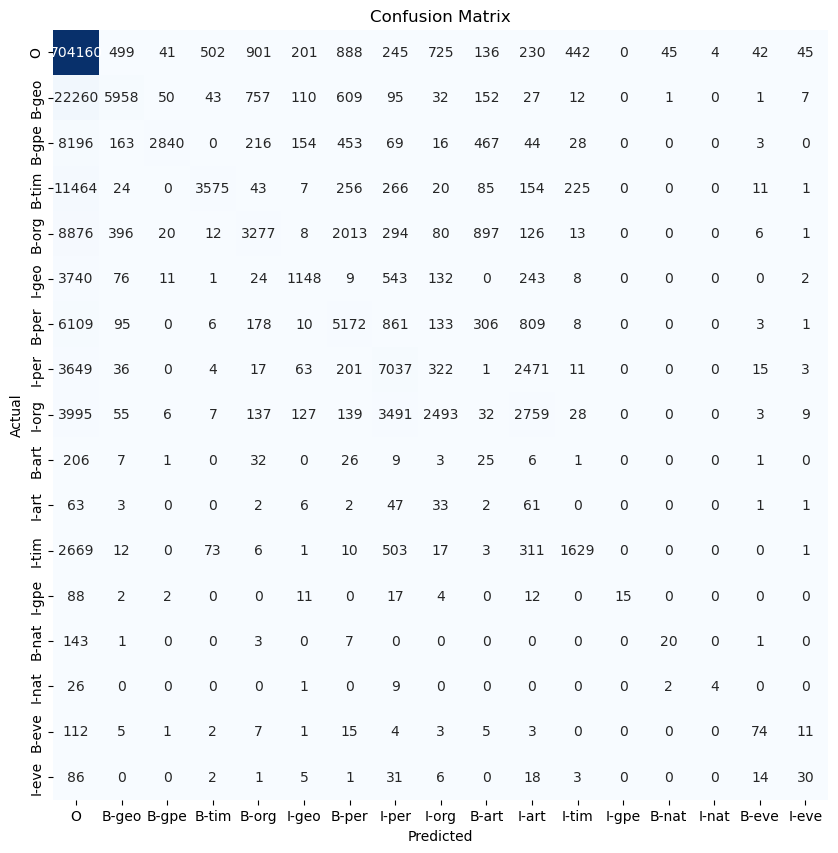

In [16]:
evaluate(y_test_true, y_test_pred_c, tag_dict_rev)

#### Tiny Test set

##### Model built without Cython

In [17]:
y_tiny_pred = predict_SP(sp, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 283.75sequence/s]


In [18]:
print_tiny_test_prediction(X_tiny, sp, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/O is/O a/O great/O company/O ./O 

I/O really/O lov

Accuracy: 0.9041
F1 Score: 0.9036


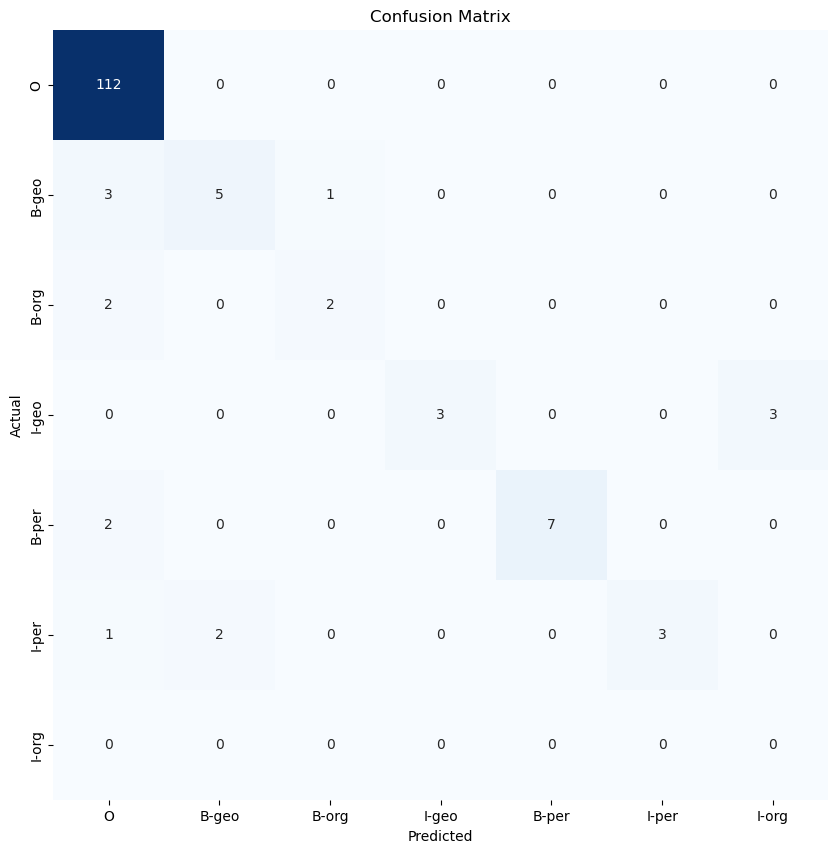

In [19]:
evaluate(y_tiny_true, y_tiny_pred, tag_dict_rev)

##### Model built with Cython

In [20]:
y_tiny_pred_c = predict_SP(sp_c, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 277.43sequence/s]


In [21]:
print_tiny_test_prediction(X_tiny, sp_c, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/O is/O a/O great/O company/O ./O 

I/O really/O lov

Accuracy: 0.9041
F1 Score: 0.9036


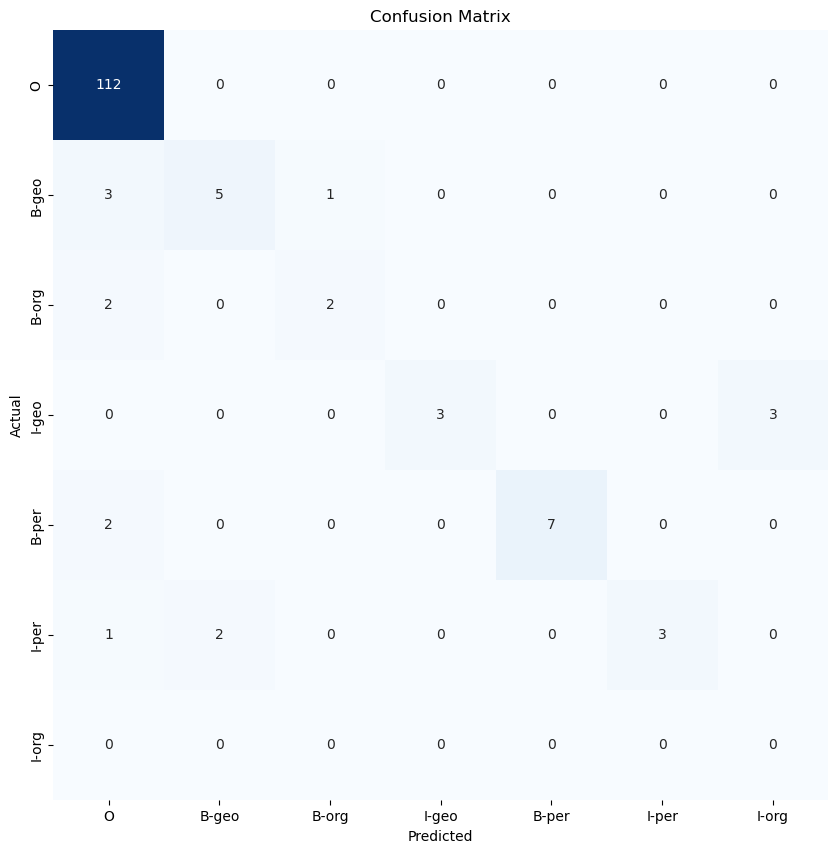

In [22]:
evaluate(y_tiny_true, y_tiny_pred_c, tag_dict_rev)

<div class="alert" style="padding: 20px;background-color: #2cbc84; color: white; margin-bottom: 15px;">
<h3>Structured Perceptron w/ New Features</h3>
</div>

### Load Model

In [23]:
feature_mapper_ext = ExtendedFeatures(train_seq)
feature_mapper_ext.build_features()

sp_ext = StructuredPerceptron(word_dict, tag_dict, feature_mapper_ext)
sp_ext_c = StructuredPerceptron(word_dict, tag_dict, feature_mapper_ext)
sp_ext.load_model(dir='fitted_models/02_SP_Extended_Features')
sp_ext_c.load_model(dir='fitted_models/02C_SP_Extended_Features')

### Evaluate Model

#### Train set

##### Model built without Cython

In [24]:
y_train_pred = predict_SP(sp_ext, X_train)

Predicting tags: 100%|██████████| 38366/38366 [04:26<00:00, 143.80sequence/s]


Accuracy: 0.9645
F1 Score: 0.9653


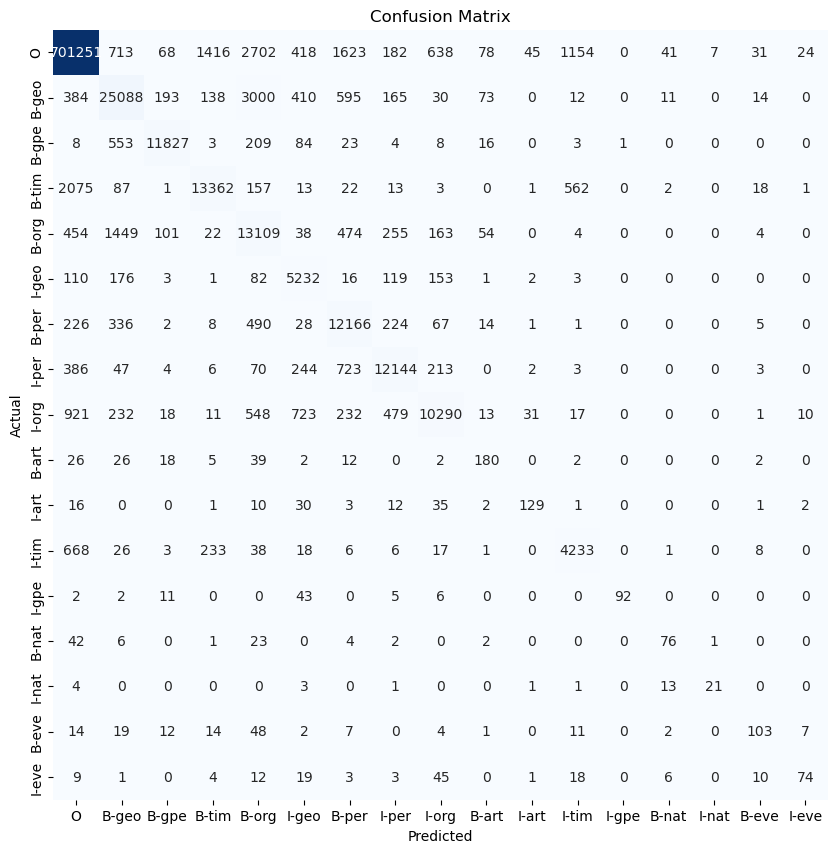

In [25]:
evaluate(y_train_true, y_train_pred, tag_dict_rev)

##### Model built with Cython

In [26]:
y_train_pred_c = predict_SP(sp_ext_c, X_train)

Predicting tags: 100%|██████████| 38366/38366 [04:12<00:00, 151.74sequence/s]


Accuracy: 0.9645
F1 Score: 0.9653


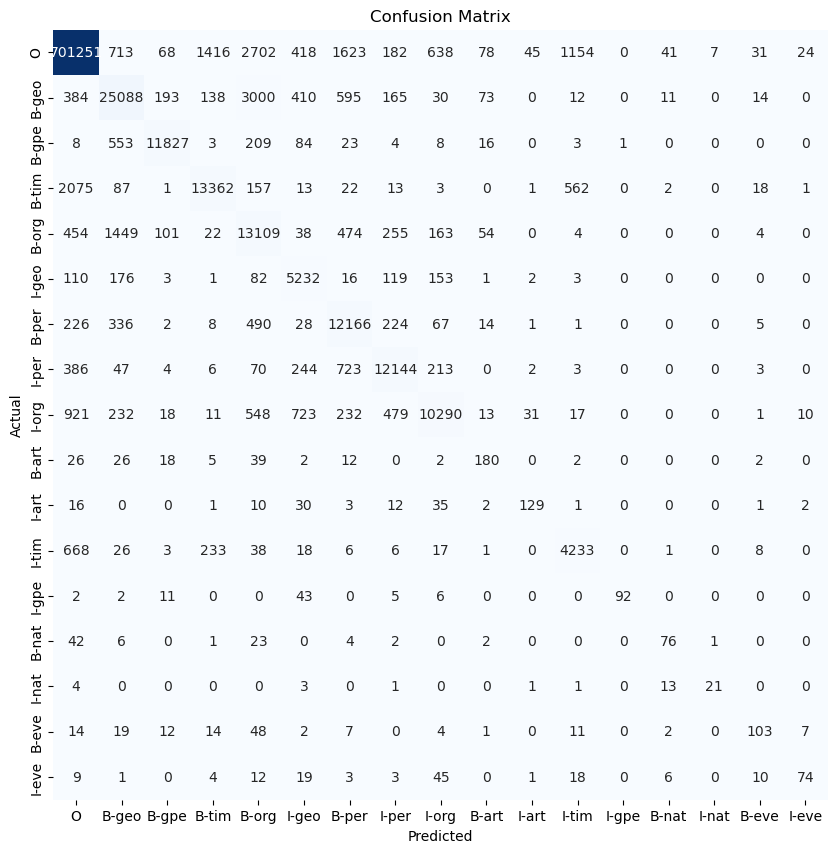

In [27]:
evaluate(y_train_true, y_train_pred_c, tag_dict_rev)

#### Test set

##### Model built without Cython

In [28]:
y_test_pred = predict_SP(sp_ext, X_test)

Predicting tags: 100%|██████████| 38367/38367 [04:23<00:00, 145.74sequence/s]


Accuracy: 0.9026
F1 Score: 0.9043


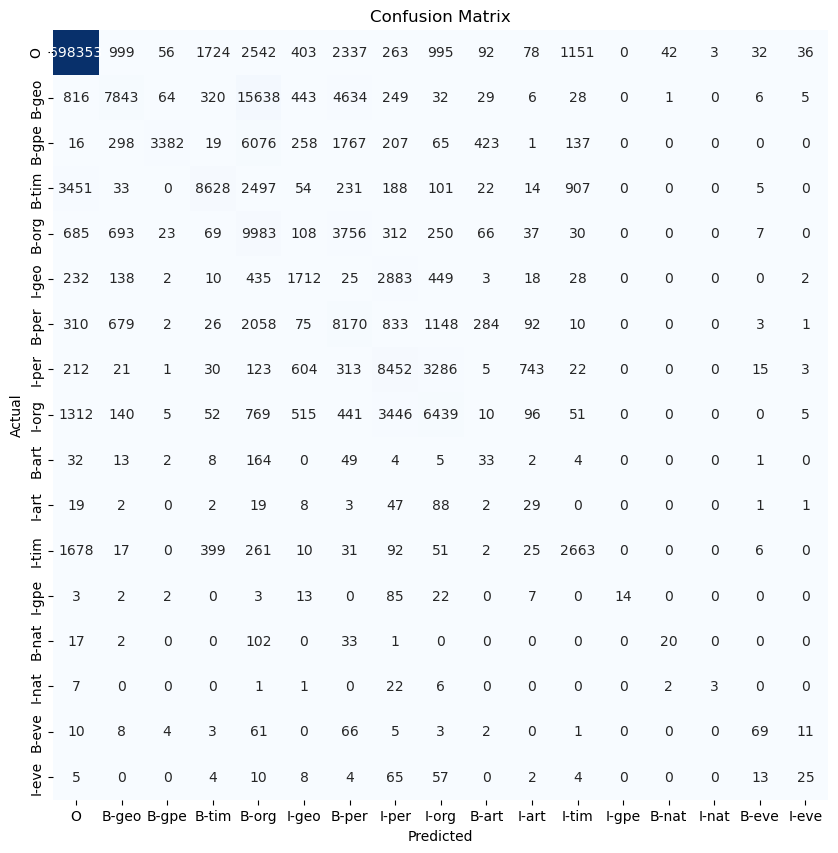

In [29]:
evaluate(y_test_true, y_test_pred, tag_dict_rev)

##### Model built with Cython

In [30]:
y_test_pred_c = predict_SP(sp_ext_c, X_test)

Predicting tags: 100%|██████████| 38367/38367 [04:16<00:00, 149.86sequence/s]


Accuracy: 0.9026
F1 Score: 0.9043


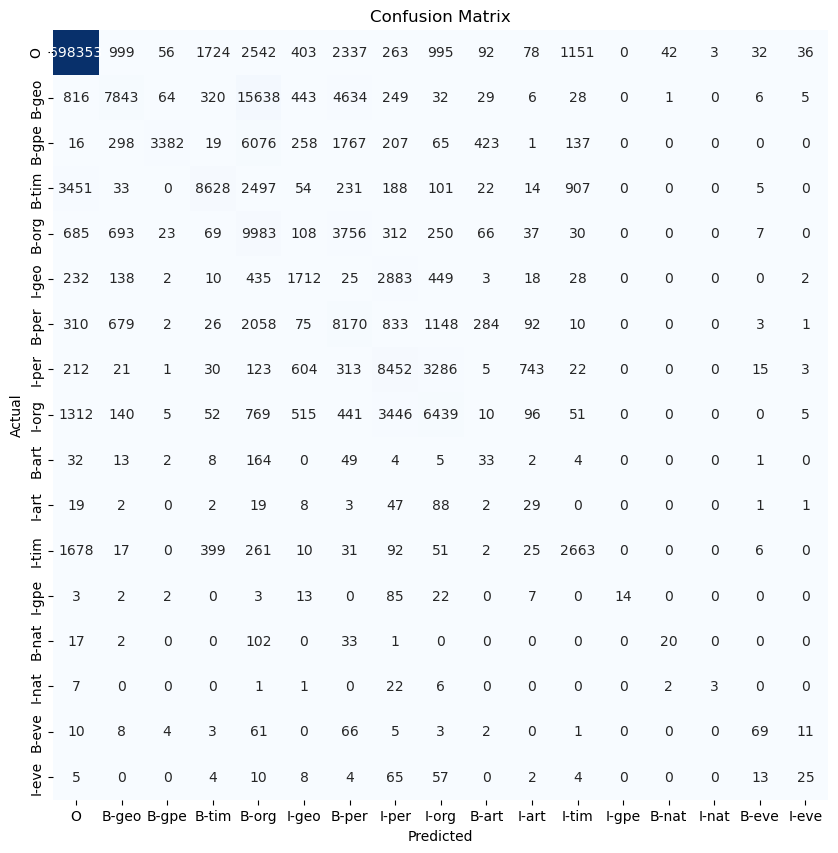

In [31]:
evaluate(y_test_true, y_test_pred_c, tag_dict_rev)

#### Tiny Test set

##### Model built without Cython

In [32]:
y_tiny_pred = predict_SP(sp_ext, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 264.25sequence/s]


In [33]:
print_tiny_test_prediction(X_tiny, sp_ext, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/B-org cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/B-org ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-org would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/B-org though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./

Accuracy: 0.9452
F1 Score: 0.9404


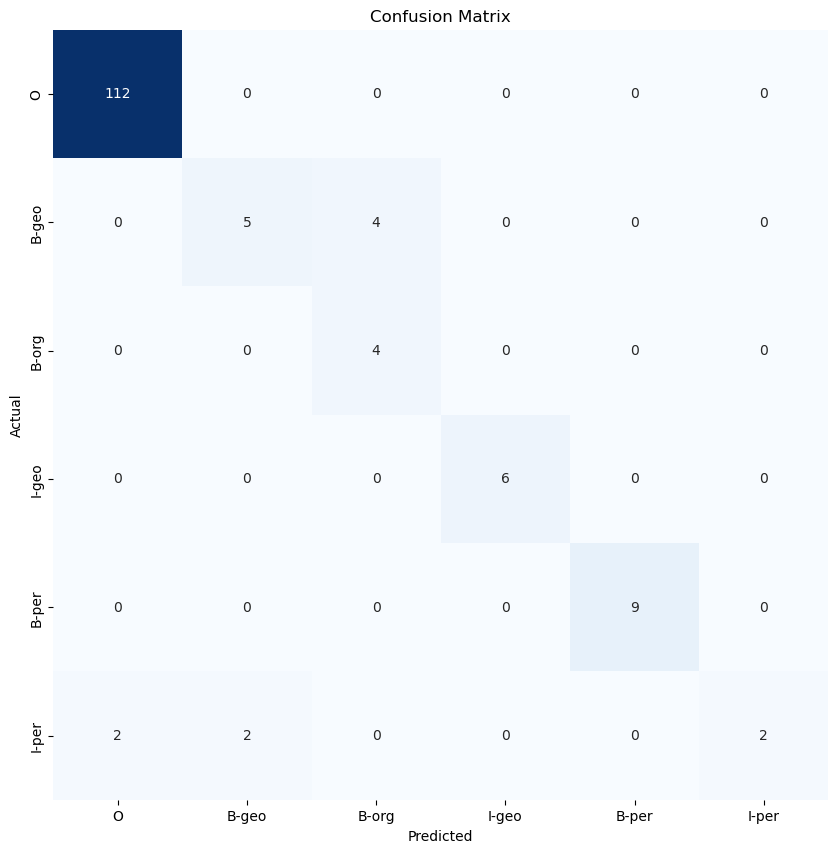

In [34]:
evaluate(y_tiny_true, y_tiny_pred, tag_dict_rev)

##### Model built with Cython

In [35]:
y_tiny_pred_c = predict_SP(sp_ext_c, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 287.55sequence/s]


In [36]:
print_tiny_test_prediction(X_tiny, sp_ext_c, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/B-org cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/B-org ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-org would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/B-org though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./

Accuracy: 0.9452
F1 Score: 0.9404


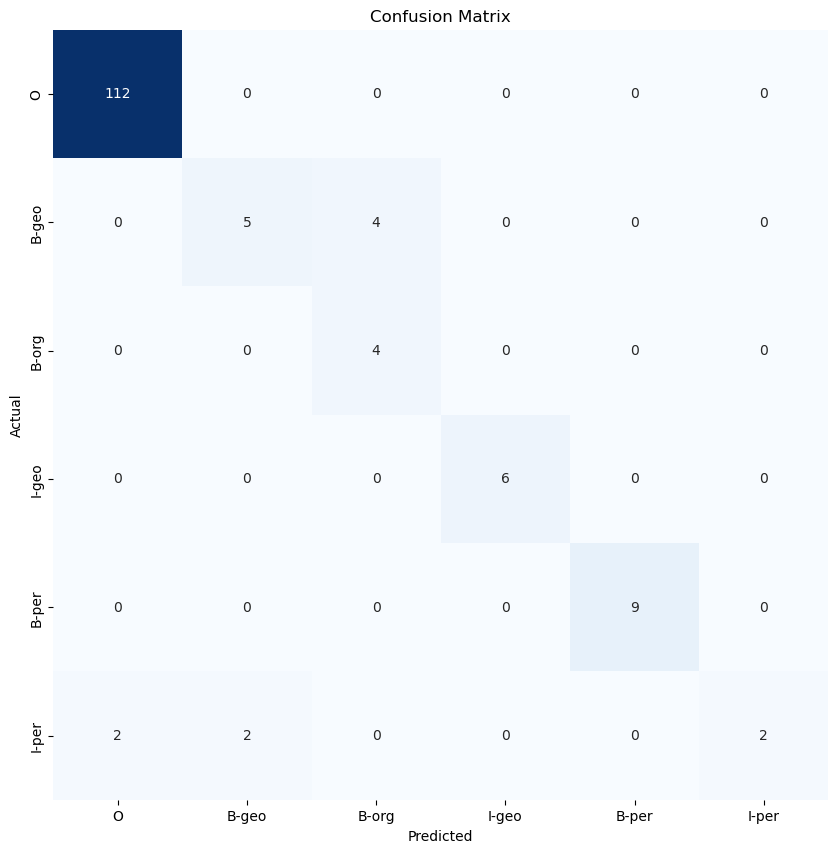

In [37]:
evaluate(y_tiny_true, y_tiny_pred_c, tag_dict_rev)

<div class="alert" style="padding: 20px;background-color: #2cbc84; color: white; margin-bottom: 15px;">
<h3> DL Approach. Bi-LSTM</h3>
</div>

### Prepare data for Bi-LSTM

In [38]:
X_train, y_train, num_words, num_tags, word2idx, tag2idx = preprocess_BiLSTM_train_data(train)
X_test, y_test = preprocess_BiLSTM_test_data(test, word2idx, tag2idx,num_words)

In [39]:
tiny_test = get_tiny_test_lstm()
X_tiny, y_tiny = preprocess_BiLSTM_test_data(tiny_test, word2idx, tag2idx,num_words)

### Load Model

In [40]:
lstm_model = load_model('fitted_models/03_BiLSTM.h5')

2023-06-16 17:58:17.536956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Evaluate Model

#### Train set

In [41]:
y_train_pred = predict_lstm(lstm_model, X_train)

1199/1199 [==============================] - 34s 28ms/step


Accuracy: 0.7986
F1 Score: 0.9935


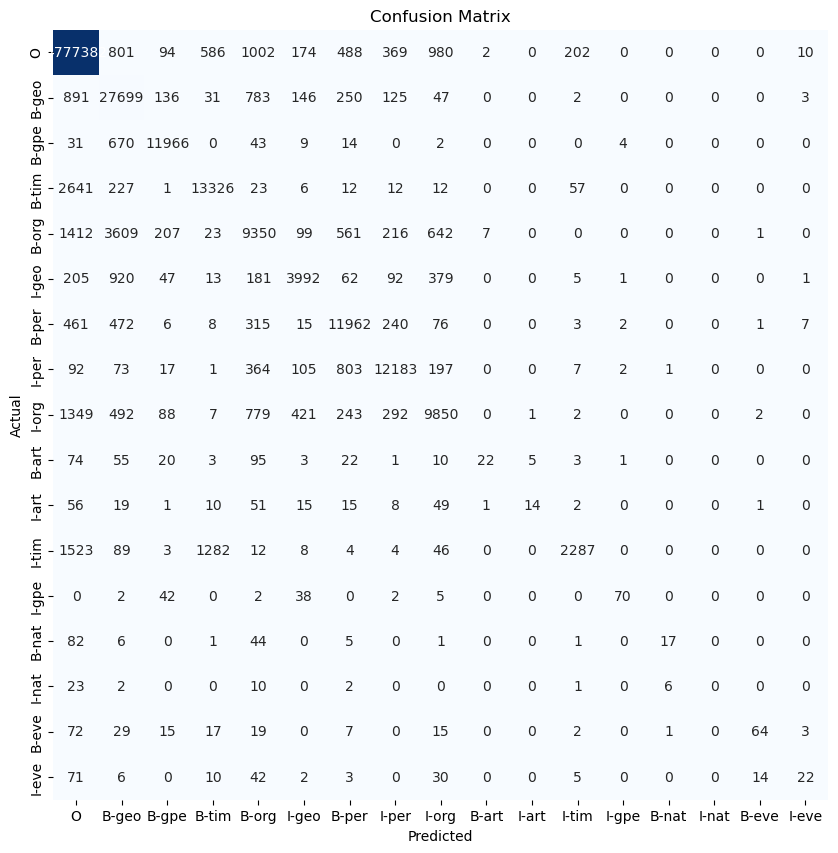

In [42]:
evaluate_lstm(y_train.flatten().tolist(), y_train_pred.flatten().tolist(), tag_dict_rev)

#### Test set

In [43]:
y_test_pred = predict_lstm(lstm_model, X_test)

1199/1199 [==============================] - 40s 33ms/step


Accuracy: 0.1669
F1 Score: 0.9699


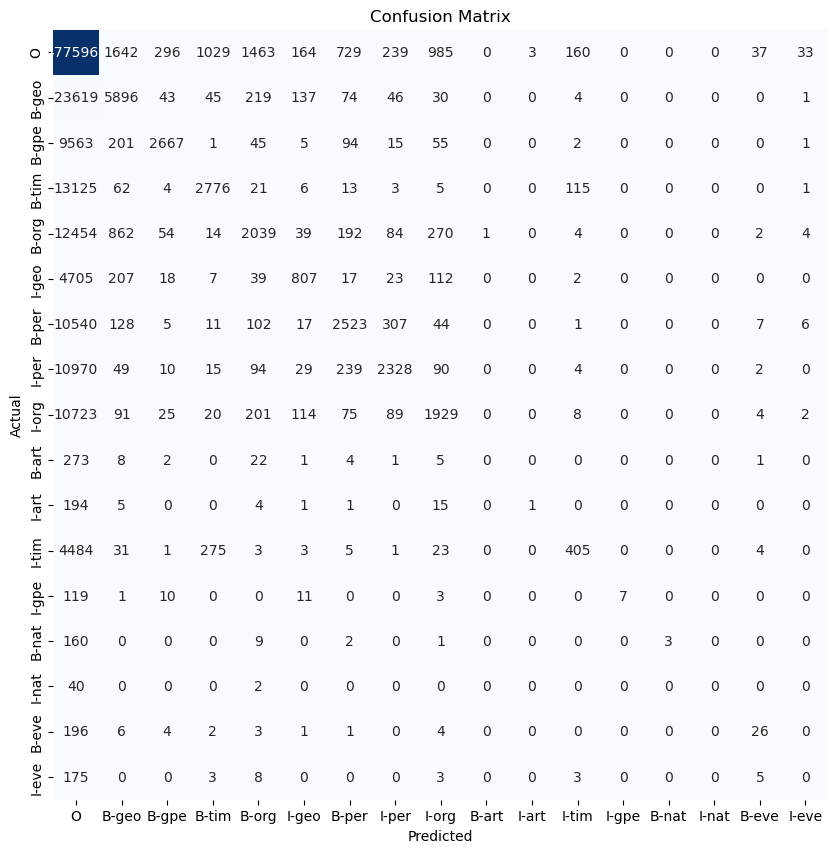

In [44]:
evaluate_lstm(y_test.flatten().tolist(), y_test_pred.flatten().tolist(), tag_dict_rev)

#### Tiny Test set

In [45]:
y_tiny_pred = predict_lstm(lstm_model, X_tiny)

1/1 [==============================] - 0s 44ms/step


In [46]:
print_tiny_test_prediction_lstm(X_tiny,y_tiny_pred, word2idx, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O ./O 

The/O programmers/O from/O write/O a/O sentence/O without/O a/O ./O 

Jack/B-per London/B-geo went/O to/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per never/O though/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/O Arabia/I-geo wanted/O total/O control/O ./O 

Robin/I-per does/O not/O want/O to/O go/O to/O Saudi/O Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./O 

I/O really/O love/O apples/O and/O ./O 



Accuracy: 0.5294
F1 Score: 0.9873


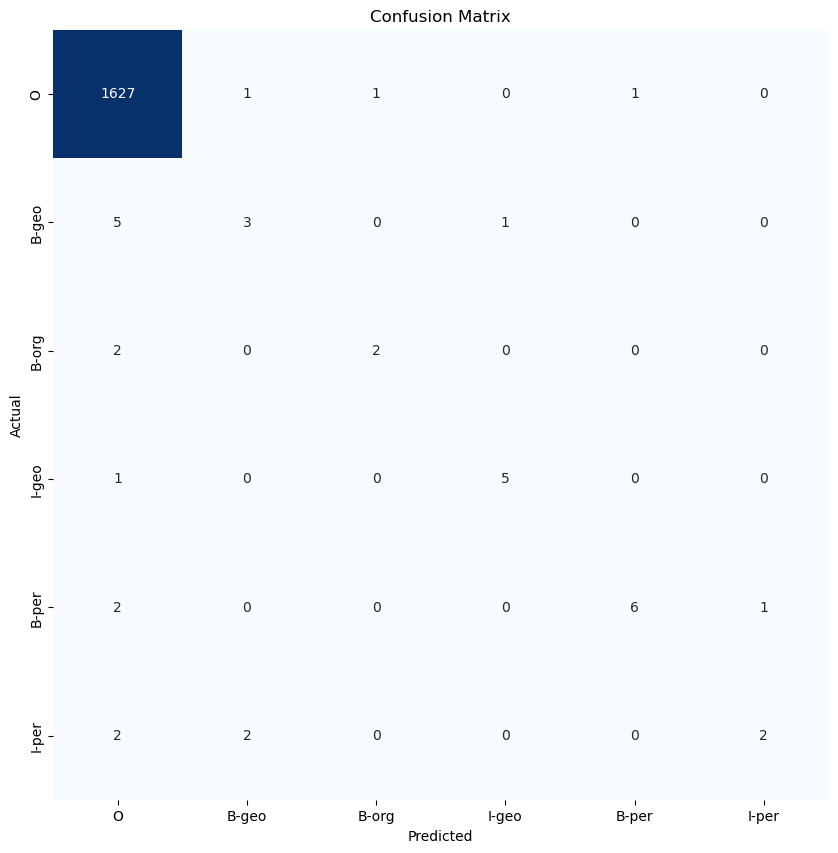

In [47]:
evaluate_lstm(y_tiny.flatten().tolist(), y_tiny_pred.flatten().tolist(), tag_dict_rev)